In [41]:
import pandas as pd 
df=pd.read_csv('/Users/rahulmanchanda/Desktop/deep-learning-ann/Churn_Modelling.csv')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle


In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
df["Gender"].unique()
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [48]:
df["Geography"].unique()
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
label_encoder_gender=LabelEncoder()
df["Gender"]=label_encoder_gender.fit_transform(df["Gender"])

In [51]:
onehot_encoder_geography=OneHotEncoder()
geoencoder=onehot_encoder_geography.fit_transform(df[["Geography"]])

In [52]:
onehot_encoder_geography.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [53]:
geoencoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [54]:
geo_encoded_df=pd.DataFrame(geoencoder.toarray(), columns=onehot_encoder_geography.get_feature_names_out(["Geography"]))

In [55]:
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df=pd.concat([df, geo_encoded_df], axis=1)

In [58]:
df=df.drop(["Geography"], axis=1)

In [59]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [60]:
with open('label_encoder_gender.pkl', 'wb') as f:
    pickle.dump(label_encoder_gender,f)
with open('onehot_encoder_geography.pkl', 'wb') as f:
    pickle.dump(onehot_encoder_geography,f)

In [61]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [62]:
X=df.drop("Exited", axis=1)
y=df["Exited"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)  

In [64]:
X_train_scaled

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [65]:
X_test_scaled

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [66]:
with open('scaler.pkl',"wb") as file:
    pickle.dump(scale,file)

ANN implementation 

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [68]:
(X_train_scaled.shape[1],)

(12,)

In [69]:
model = Sequential([

    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:

optm=tf.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
model.compile(optimizer=optm, loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
import datetime

In [74]:
logs_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback=TensorBoard(log_dir=logs_dir, histogram_freq=1)

In [75]:
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [76]:
history=model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=100, callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/100
250/250 [==============================] - 0s 546us/step - loss: 0.3963 - accuracy: 0.8372 - val_loss: 0.3620 - val_accuracy: 0.8505
Epoch 2/100
250/250 [==============================] - 0s 397us/step - loss: 0.3585 - accuracy: 0.8499 - val_loss: 0.3610 - val_accuracy: 0.8500
Epoch 3/100
250/250 [==============================] - 0s 379us/step - loss: 0.3507 - accuracy: 0.8574 - val_loss: 0.3511 - val_accuracy: 0.8585
Epoch 4/100
250/250 [==============================] - 0s 378us/step - loss: 0.3436 - accuracy: 0.8624 - val_loss: 0.3511 - val_accuracy: 0.8615
Epoch 5/100
250/250 [==============================] - 0s 384us/step - loss: 0.3397 - accuracy: 0.8596 - val_loss: 0.3495 - val_accuracy: 0.8575
Epoch 6/100
250/250 [==============================] - 0s 378us/step - loss: 0.3350 - accuracy: 0.8633 - val_loss: 0.3637 - val_accuracy: 0.8520
Epoch 7/100
250/250 [==============================] - 0s 373us/step - loss: 0.3375 - accuracy: 0.8620 - val_loss: 0.3510 - val_ac

In [77]:
model.save('churn_model.h5')

/Users/rahulmanchanda/Desktop/deep-learning-ann/venv311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/var/folders/d8/0vhs_fsn79zfcc0bpkcqbsmh0000gn/T/ipykernel_24132/3748540202.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d8/0vhs_fsn79zfcc0bpkcqbsmh0000gn/T/ipykernel_24132/3748540202.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('training_accuracy_curve.png', dpi=300)
/Users/rahulmanchanda/Desktop/deep-learning-ann/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


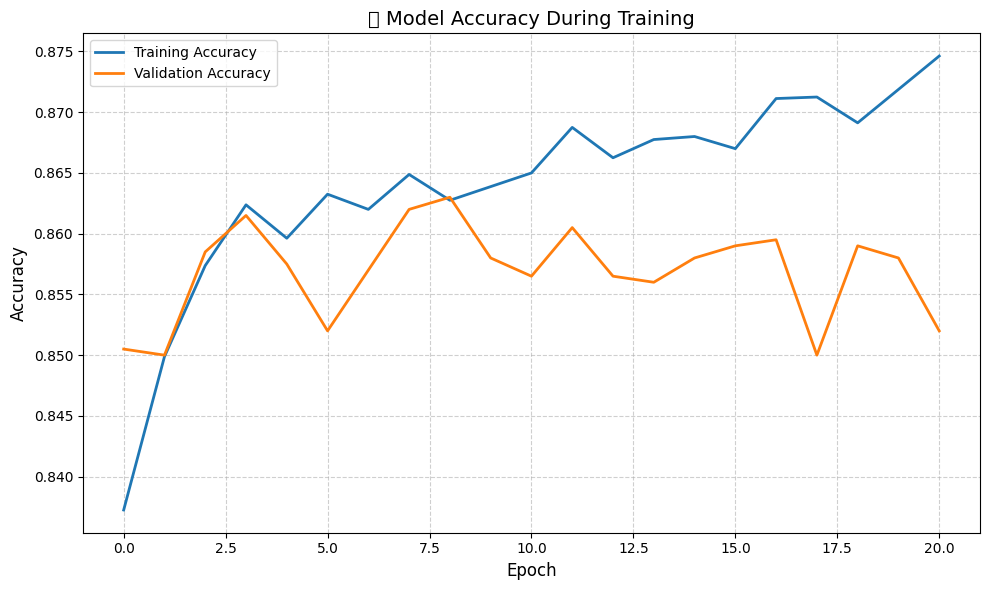

/var/folders/d8/0vhs_fsn79zfcc0bpkcqbsmh0000gn/T/ipykernel_24132/3748540202.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d8/0vhs_fsn79zfcc0bpkcqbsmh0000gn/T/ipykernel_24132/3748540202.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('training_loss_curve.png', dpi=300)
/Users/rahulmanchanda/Desktop/deep-learning-ann/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


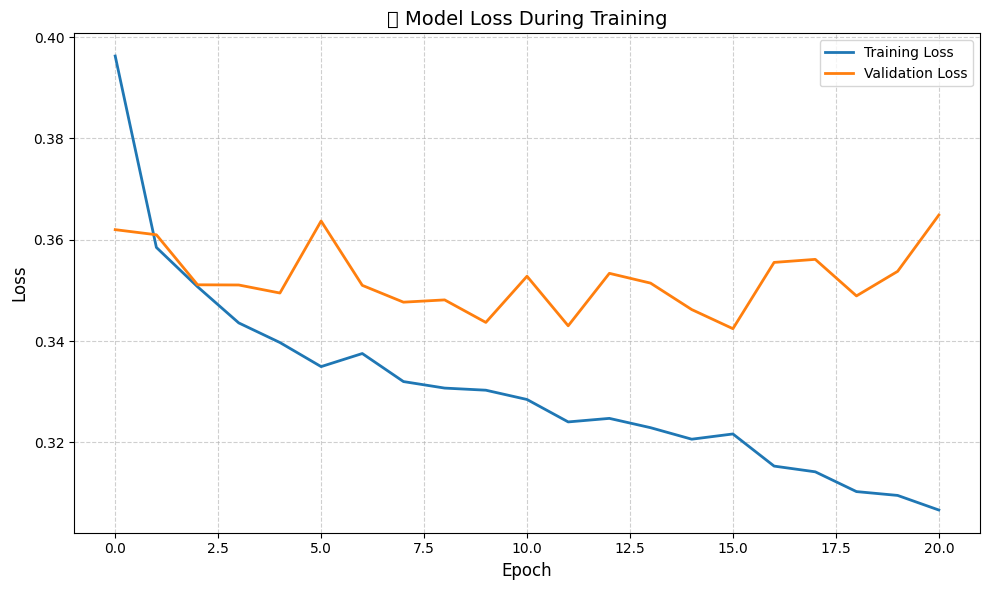

In [78]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit(...)
# Example:
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('📈 Model Accuracy During Training', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('training_accuracy_curve.png', dpi=300)
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('📉 Model Loss During Training', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('training_loss_curve.png', dpi=300)
plt.show()


In [79]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [80]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 24147), started 2 days, 16:05:58 ago. (Use '!kill 24147' to kill it.)